# Código de la P3: Regresión:
## Ignacio Garach Vélez 

En primer lugar cargaremos las funciones proporcionadas en la plantilla:

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.dummy import DummyRegressor

plt.rcParams["figure.figsize"] = (7, 5)

Cargamos los datos:

In [2]:
data = pd.read_csv('datos/regresion/YearPredictionMSD.txt', sep = ',', header=None)
values = data.values

data

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515340,2006,51.28467,45.88068,22.19582,-5.53319,-3.61835,-16.36914,2.12652,5.18160,-8.66890,...,4.81440,-3.75991,-30.92584,26.33968,-5.03390,21.86037,-142.29410,3.42901,-41.14721,-15.46052
515341,2006,49.87870,37.93125,18.65987,-3.63581,-27.75665,-18.52988,7.76108,3.56109,-2.50351,...,32.38589,-32.75535,-61.05473,56.65182,15.29965,95.88193,-10.63242,12.96552,92.11633,10.88815
515342,2006,45.12852,12.65758,-38.72018,8.80882,-29.29985,-2.28706,-18.40424,-22.28726,-4.52429,...,-18.73598,-71.15954,-123.98443,121.26989,10.89629,34.62409,-248.61020,-6.07171,53.96319,-8.09364
515343,2006,44.16614,32.38368,-3.34971,-2.49165,-19.59278,-18.67098,8.78428,4.02039,-12.01230,...,67.16763,282.77624,-4.63677,144.00125,21.62652,-29.72432,71.47198,20.32240,14.83107,39.74909


No hay nulos

In [3]:
print(data.isnull().sum().sum())

0


No necesitamos codificación como en clasificación pues todo es numérico

In [4]:
xy = data.to_numpy()
x = np.delete(xy, 0, axis=1)
y = xy[:, 0]

In [5]:
y

array([2001., 2001., 2001., ..., 2006., 2006., 2005.])

Mostramos una leve visualización para hacernos una idea de los datos:

Text(0, 0.5, 'Número de canciones')

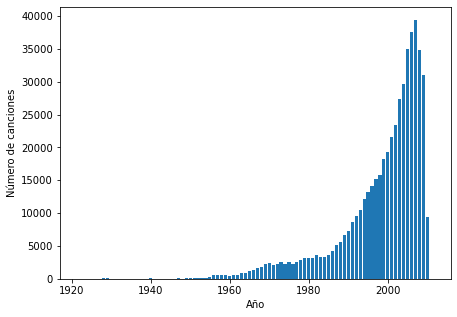

In [6]:
canciones = []
for i in range(1922,2012):
    canciones.append((y==i).sum())
yrs = range(1922,2012)
plt.bar(yrs, canciones, align='center')
plt.xlabel("Año")
plt.ylabel("Número de canciones")

Realizamos la separación en conjuntos de entrenamiento y test:

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, shuffle = True, random_state=1)

In [8]:
y_test

array([1999., 2010., 1987., ..., 2000., 1990., 1991.])

Necesitaremos normalización ya que hay multiples escalas:

In [9]:
print(pd.DataFrame(x_train).describe().T)

       count       mean         std         min         25%        50%  \
0   412276.0  43.385450    6.070779     1.74900   39.954957  44.259045   
1   412276.0   1.232529   51.640668  -337.09250  -26.114227   8.403330   
2   412276.0   8.656066   35.305826  -301.00506  -11.424830  10.476125   
3   412276.0   1.147573   16.313635  -154.18358   -8.508827  -0.666865   
4   412276.0  -6.561724   22.852778  -181.95337  -20.673230  -6.015045   
..       ...        ...         ...         ...         ...        ...   
85  412276.0  17.667778  114.538332 -2678.19368  -31.584005  15.585005   
86  412276.0 -26.397773  174.154532 -4319.99232 -101.590810 -21.250005   
87  412276.0   4.464430   13.330720  -236.03926   -2.558488   3.114565   
88  412276.0  20.133354  185.545162 -7458.37815  -59.498662   7.822265   
89  412276.0   1.327912   22.081003  -318.22333   -8.811872   0.054525   

          75%         max  
0   47.835943    61.97014  
1   36.094235   384.06573  
2   29.776537   322.85143  

In [10]:
len(x_train[0])

90

Analizamos la correlación:

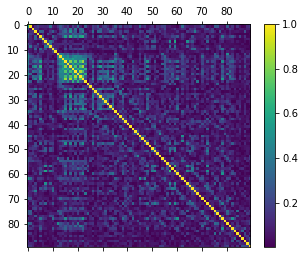

In [11]:
corr = np.abs(np.corrcoef(x_train, rowvar=False))
plt.matshow(corr, cmap='viridis')
plt.colorbar(shrink=0.8)

Estandarizamos los datos:

In [12]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

Esta siguiente decisión ha sido clave para mejorar el modelo, pasando de R2 de 0.13 a 0.23, escalaremos el año a predecir al intervalo [0, 1] esto influye de forma decisiva en el funcionamiento de los algoritmos: Al finalizar necesitaremos realizar la transformada inversa:

In [13]:
scaler = MinMaxScaler()
scaler.fit(y_train.reshape(-1, 1))

y_train = scaler.transform(y_train.reshape(-1, 1))
y_test = scaler.transform(y_test.reshape(-1, 1))

Comprobamos la nueva distribución:

In [14]:
print(pd.DataFrame(x_train).describe().T)

       count          mean       std        min       25%       50%       75%  \
0   412276.0  8.065146e-14  1.000001  -6.858510 -0.565083  0.143902  0.733102   
1   412276.0  1.958232e-16  1.000001  -6.551531 -0.529559  0.138860  0.675083   
2   412276.0  3.927737e-15  1.000001  -8.770833 -0.568771  0.051551  0.598216   
3   412276.0 -2.592201e-15  1.000001  -9.521565 -0.591923 -0.111222  0.467137   
4   412276.0  4.785693e-15  1.000001  -7.674859 -0.617497  0.023922  0.626290   
..       ...           ...       ...        ...       ...       ...       ...   
85  412276.0  1.946681e-15  1.000001 -23.536791 -0.430003 -0.018184  0.437463   
86  412276.0 -1.494569e-15  1.000001 -24.653965 -0.431761  0.029559  0.452398   
87  412276.0 -1.640765e-15  1.000001 -18.041335 -0.526823 -0.101260  0.412595   
88  412276.0  1.479597e-15  1.000001 -40.305662 -0.429179 -0.066351  0.357568   
89  412276.0 -4.642182e-16  1.000001 -14.471790 -0.459209 -0.057669  0.378407   

          max  
0    3.0613

Realizaremos análisis de componentes principales para reducir la dimensionalidad: (Finalmente se opta por no usarla ya que al bajar la dimensionalidad se empeoraban los resultados y puesto que no se ha optado por usar transformaciones polinómicas por cuestiones de tiempo y espacio no es crucial para poder entrenar a tiempo el modelo.)

In [15]:
#pca = PCA()
#x_train = pca.fit_transform(x_train)
#x_test = pca.transform(x_test)

In [16]:
len(x_train[0])

90

Pasamos a realizar la CV y la elección de parámetros y modelo:

In [17]:
linear = SGDRegressor(max_iter=1000, random_state=1)
parameters = [{'penalty':['l1', 'l2'], 'alpha':np.logspace(-4, 4, 10)}]
model = GridSearchCV(linear, parameters, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, return_train_score=True)
model.fit(x_train,y_train)

C:\Users\ignan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GridSearchCV(cv=5, estimator=SGDRegressor(random_state=1), n_jobs=-1,
             param_grid=[{'alpha': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                          'penalty': ['l1', 'l2']}],
             return_train_score=True, scoring='neg_mean_squared_error')

Mostramos los parámetros del modelo escogido:

In [18]:
model.best_params_

{'alpha': 0.0001, 'penalty': 'l1'}

Mostramos el error cuadrático medio en train/test:

In [19]:
model.score(x_test, y_test)

-0.011562806891436971

In [20]:
model.score(x_train, y_train)

-0.011616717375234068

Realizamos la transformada inversa para calcular el R2:

In [21]:
yhat = model.predict(x_test)
yhat = scaler.inverse_transform(yhat.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

In [22]:
yhat

array([[1997.61949017],
       [1999.60158826],
       [1997.66175354],
       ...,
       [2001.52505524],
       [1997.73679375],
       [1994.17127674]])

In [23]:
y_test

array([[1999.],
       [2010.],
       [1987.],
       ...,
       [2000.],
       [1990.],
       [1991.]])

Calculamos R2:

In [24]:
r2_score(y_test, yhat)

0.23516127516126983

In [25]:
r2_score(y_train, model.predict(x_train))

0.22948899782109167

Análisis de acierto con un margen de 5, 10, 15 y 20 años:

In [26]:
margen = 5
aciertos = 0
for i in range(len(yhat)):
    if yhat[i] < y_test[i]+(margen/2) and yhat[i] > y_test[i]-(margen/2):
        aciertos+=1
        
aciertos/len(yhat)

0.26001998661091114

In [27]:
margen = 10
aciertos = 0
for i in range(len(yhat)):
    if yhat[i] < y_test[i]+(margen/2) and yhat[i] > y_test[i]-(margen/2):
        aciertos+=1
        
aciertos/len(yhat)

0.4988017735691624

In [28]:
margen = 15
aciertos = 0
for i in range(len(yhat)):
    if yhat[i] < y_test[i]+(margen/2) and yhat[i] > y_test[i]-(margen/2):
        aciertos+=1
        
aciertos/len(yhat)

0.6885678526035957

In [29]:
margen = 20
aciertos = 0
for i in range(len(yhat)):
    if yhat[i] < y_test[i]+(margen/2) and yhat[i] > y_test[i]-(margen/2):
        aciertos+=1
        
aciertos/len(yhat)

0.8026952818015116

Introducimos la función tomada de Scikit_Learn para calcular las curvas https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py:

In [30]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

Calculamos las curvas, es muy costoso...

C:\Users\ignan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ignan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ignan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ignan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

<module 'matplotlib.pyplot' from 'C:\\Users\\ignan\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

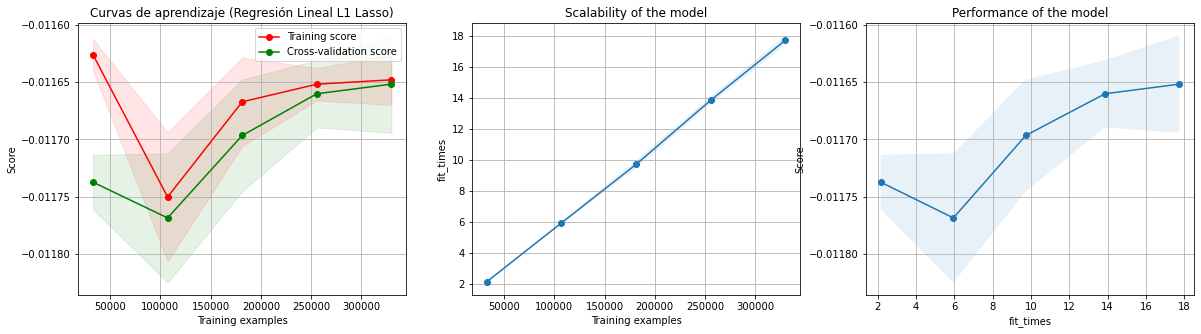

In [31]:
#title = "Curvas de aprendizaje (Regresión Lineal L1 Lasso)"

#plot_learning_curve(model, title, x_train, y_train)